In [1]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [8]:
# Build neural network for f1 + f2 epsilon = 0.01 and a = 0.001

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.001), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred_001 = model.predict(X_test)
J_001 = history.history['loss']

Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.1494
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0217
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0049
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0040
Epoch 10/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 11/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 12/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 13/200


700/700 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 197/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 198/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 199/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 200/200
10/10 [==============================] - 0s 1ms/step
[[0.75499064 0.30909017 0.8343367  0.35586333]
 [0.6927829  0.28188708 0.8213     0.3274352 ]
 [0.69583166 0.29136133 0.68714994 0.38811874]
 [0.77646357 0.34278637 0.7899269  0.46944982]
 [0.75453496 0.27891117 0.82263446 0.32992357]]
10/10 [==============================] - 0s 2ms/step


In [ ]:
diff_1 = abs(predictions - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_1.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_1.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_1.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_1.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_1.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.01$')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [9]:
# Build neural network for f1 + f2 epsilon = 0.01 and a = 0.001

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.01), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred_01 = model.predict(X_test)
J_01 = history.history['loss']

Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0138
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0025
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0021
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 10/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 11/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 12/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 13/200


700/700 [==============================] - 1s 1ms/step - loss: 4.3066e-04
Epoch 190/200
700/700 [==============================] - 1s 1ms/step - loss: 4.3077e-04
Epoch 191/200
700/700 [==============================] - 1s 2ms/step - loss: 4.3001e-04
Epoch 192/200
700/700 [==============================] - 1s 2ms/step - loss: 4.2780e-04
Epoch 193/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2512e-04
Epoch 194/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2578e-04
Epoch 195/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2383e-04
Epoch 196/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2519e-04
Epoch 197/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2430e-04
Epoch 198/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2094e-04
Epoch 199/200
700/700 [==============================] - 1s 1ms/step - loss: 4.2317e-04
Epoch 200/200
10/10 [=========================

In [10]:
# Build neural network for f1 + f2 epsilon = 0.01 and a = 0.001

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred_1 = model.predict(X_test)
J_1 = history.history['loss']

Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 9.4957e-04
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 8.7132e-04
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 8.2304e-04
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 7.4536e-04
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 7.1999e-04
Epoch 10/200
700/700 [==============================] - 1s 1ms/step - loss: 6.7858e-04
Epoch 11/200
700/700 [==============================] - 1s 1ms/step - loss: 6.5694e-04
Epoch 12/200
700/700 [==============================] - 1s 1ms/step 

700/700 [==============================] - 1s 1ms/step - loss: 2.3520e-04
Epoch 189/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2922e-04
Epoch 190/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2119e-04
Epoch 191/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2448e-04
Epoch 192/200
700/700 [==============================] - 1s 1ms/step - loss: 2.3149e-04
Epoch 193/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2407e-04
Epoch 194/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2856e-04
Epoch 195/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2589e-04
Epoch 196/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2457e-04
Epoch 197/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2448e-04
Epoch 198/200
700/700 [==============================] - 1s 1ms/step - loss: 2.2960e-04
Epoch 199/200
700/700 [=======================

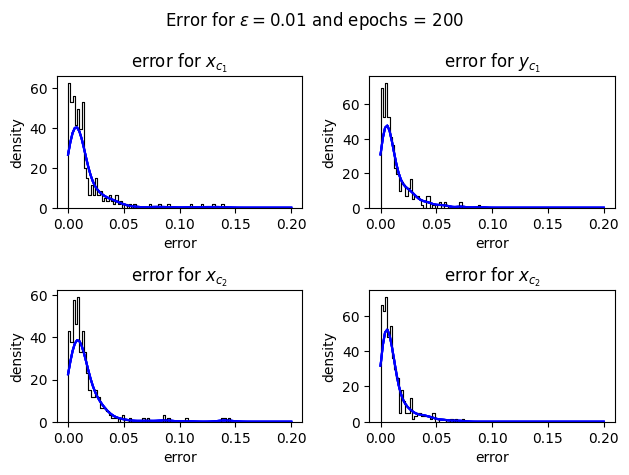

In [20]:
diff_1 = abs(y_pred_1 - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_1.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_1.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_1.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_1.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_1.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.01$ and epochs = 200')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [30]:
print(format(np.min(diff_1.iloc[:,0]),".6f"))
print(format(np.min(diff_1.iloc[:,1]),".6f"))
print(format(np.min(diff_1.iloc[:,2]),".6f"))
print(format(np.min(diff_1.iloc[:,3]),".6f"))

print(format(np.max(diff_1.iloc[:,0]),".6f"))
print(format(np.max(diff_1.iloc[:,1]),".6f"))
print(format(np.max(diff_1.iloc[:,2]),".6f"))
print(format(np.max(diff_1.iloc[:,3]),".6f"))

print(format(np.mean(diff_1.iloc[:,0]),".6f"))
print(format(np.mean(diff_1.iloc[:,1]),".6f"))
print(format(np.mean(diff_1.iloc[:,2]),".6f"))
print(format(np.mean(diff_1.iloc[:,3]),".6f"))

print(format(np.var(diff_1.iloc[:,0]),".6f"))
print(format(np.var(diff_1.iloc[:,1]),".6f"))
print(format(np.var(diff_1.iloc[:,2]),".6f"))
print(format(np.var(diff_1.iloc[:,3]),".6f"))

0.000030
0.000031
0.000110
0.000020
0.138600
0.088708
0.144202
0.073778
0.014346
0.012775
0.015444
0.011787
0.000338
0.000185
0.000361
0.000153


0.0013434597058221698
0.0004203272401355207
0.00021303158428054303


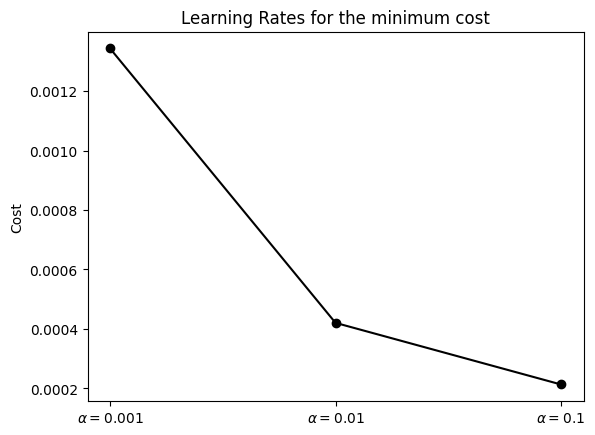

In [11]:
# Graphs for learning rate:
print(np.min(J_001))
print(np.min(J_01))
print(np.min(J_1))

plt.plot([1, 2, 3],[np.min(J_001),np.min(J_01),np.min(J_1)],color = 'black',marker = 'o')
# Add title and labels to the plot
plt.title('Learning Rates for the minimum cost')
# Set custom tick labels on the x-axis with LaTeX formatting
plt.xticks([1, 2, 3],[r'$\alpha = 0.001$', r'$\alpha = 0.01$', r'$\alpha = 0.1$'])
plt.ylabel('Cost')
plt.show()

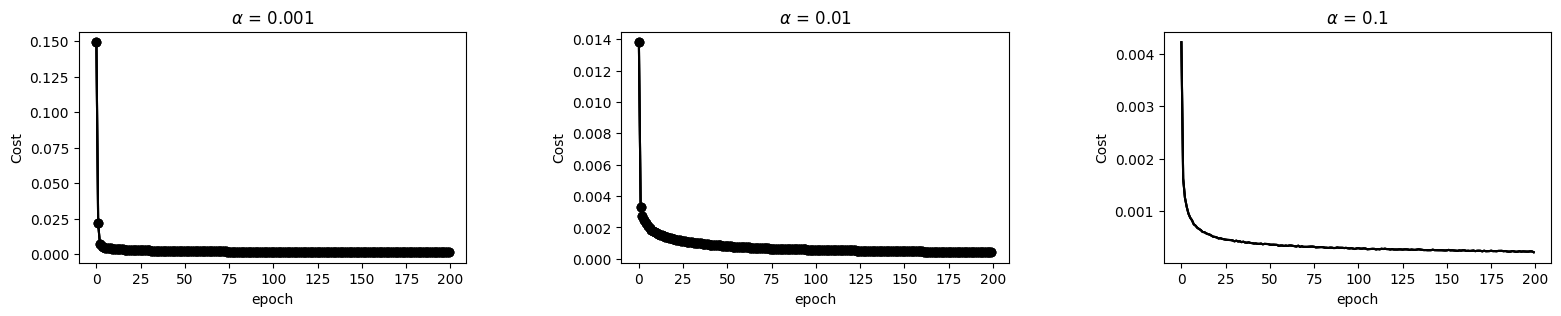

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,3))

for ax in enumerate(axes.flatten()):
    axes[0].plot(range(200),J_001,color='black',marker = 'o')
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel('Cost')
    axes[0].set_title(r'$\alpha$ = 0.001')
    
    axes[1].plot(range(200),J_01,color='black',marker='o')
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel('Cost')
    axes[1].set_title(r'$\alpha$ = 0.01')
    
    axes[2].plot(range(200),J_1,color='black')
    axes[2].set_xlabel("epoch")
    axes[2].set_ylabel('Cost')
    axes[2].set_title(r'$\alpha$ = 0.1')
    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

In [15]:
# Build neural network for f1 + f2 epsilon = 0.01 and a = 0.001

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred_1_100 = model.predict(X_test)

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 9.6616e-04
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 8.9882e-04
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 8.4456e-04
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 8.3065e-04
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 7.8347e-04
Epoch 11/100
700/700 [==============================] - 1s 1ms/step - loss: 7.5075e-04
Epoch 12/100
700/700 [==============================] - 1s 1ms/step - lo

700/700 [==============================] - 1s 2ms/step - loss: 3.0641e-04
Epoch 96/100
700/700 [==============================] - 1s 1ms/step - loss: 3.0505e-04
Epoch 97/100
700/700 [==============================] - 1s 1ms/step - loss: 3.0028e-04
Epoch 98/100
700/700 [==============================] - 1s 1ms/step - loss: 2.9575e-04
Epoch 99/100
700/700 [==============================] - 1s 1ms/step - loss: 2.9236e-04
Epoch 100/100
10/10 [==============================] - 0s 2ms/step
[[0.7899606  0.18022096 0.81657743 0.4532779 ]
 [0.7251841  0.2626739  0.83158755 0.35306782]
 [0.69275737 0.20834976 0.7473619  0.43856716]
 [0.74974835 0.42574367 0.73908806 0.42827535]
 [0.7463515  0.28819042 0.8054742  0.32397407]]
10/10 [==============================] - 0s 2ms/step


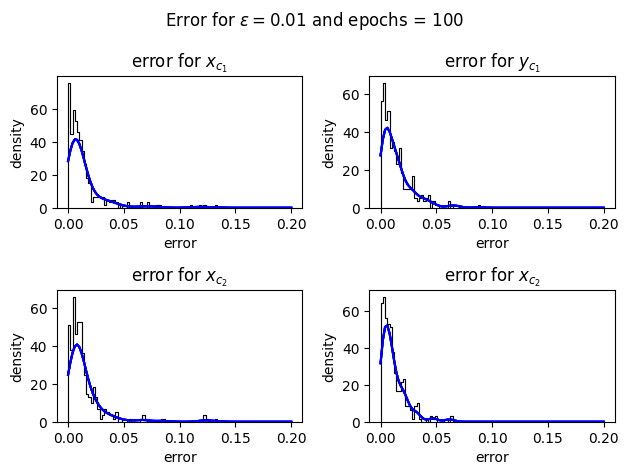

In [19]:
diff_1_100 = abs(y_pred_1_100 - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_100.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_1_100.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_1_100.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_1_100.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1_100.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_1_100.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1_100.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_1_100.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.01$ and epochs = 100')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [29]:
print(format(np.min(diff_1_100.iloc[:,0]),".6f"))
print(format(np.min(diff_1_100.iloc[:,1]),".6f"))
print(format(np.min(diff_1_100.iloc[:,2]),".6f"))
print(format(np.min(diff_1_100.iloc[:,3]),".6f"))

print(format(np.max(diff_1_100.iloc[:,0]),".6f"))
print(format(np.max(diff_1_100.iloc[:,1]),".6f"))
print(format(np.max(diff_1_100.iloc[:,2]),".6f"))
print(format(np.max(diff_1_100.iloc[:,3]),".6f"))

print(format(np.mean(diff_1_100.iloc[:,0]),".6f"))
print(format(np.mean(diff_1_100.iloc[:,1]),".6f"))
print(format(np.mean(diff_1_100.iloc[:,2]),".6f"))
print(format(np.mean(diff_1_100.iloc[:,3]),".6f"))

print(format(np.var(diff_1_100.iloc[:,0]),".6f"))
print(format(np.var(diff_1_100.iloc[:,1]),".6f"))
print(format(np.var(diff_1_100.iloc[:,2]),".6f"))
print(format(np.var(diff_1_100.iloc[:,3]),".6f"))

0.000002
0.000027
0.000036
0.000040
0.132896
0.088679
0.132849
0.064192
0.013831
0.013905
0.014706
0.011543
0.000336
0.000187
0.000338
0.000126
